In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
bottom_line = [0,5]
finger_line = [0,1]
thumb_ver = [0,3]
forefinger_ver = [0,4]
middlefinger_ver = [0,4.5]
ringfinger_ver = [0,4.25]
littlefinger_ver = [0,3.7]

bottom_line = [[0,0], [0,5]]
'''fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(projection='3d')'''

"fig = plt.figure(figsize=(12,10))\nax = fig.add_subplot(projection='3d')"

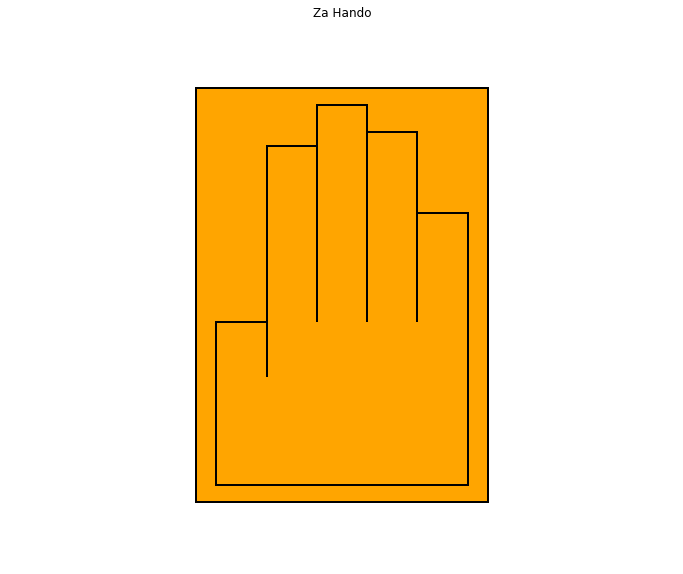

In [21]:
from matplotlib.path import Path
import matplotlib.patches as patches


# (x,y)
verts = [
    (0.,0.),
    (5.,0.),
    (5.,5.), # little finger
    (4.,5.), # little finger
    (4.,3.), # separate fingers
    (4.,6.5), # ring finger
    (3.,6.5), # ring finger
    (3.,3.), # separate fingers
    (3.,7.), # middle finger
    (2.,7.), # middle finger
    (2.,3.), # separate fingers
    (2.,6.25), # forefinger
    (1.,6.25), #forefinger
    (1.,2.), # separate fingers
    (1.,3.), # thumb
    (0.,3.), # thumb
    (0.,0.)
]

scale_verts = [(i[0]*0.75, i[1]) for i in verts]

##--- Centre the figure ---##
x_max = np.max([i[0] for i in scale_verts])
x_min = np.min([i[0] for i in scale_verts])

y_max = np.max([i[1] for i in scale_verts])
y_min = np.min([i[1] for i in scale_verts])

new_scale_verts = [(i[0]-x_max/2, i[1]-y_max/2) for i in scale_verts]
##--- Centre the figure ---##

codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]

path = Path(new_scale_verts, codes)

fig, ax = plt.subplots(figsize=(12,10))
patch = patches.PathPatch(path, facecolor='orange', lw=2)
#ax.add_patch(patch)

###### background patch ######
threshold = 0.3

verts1 = [
    (-x_max/2 - threshold, -y_max/2 - threshold),
    (x_max/2 + threshold, -y_max/2 - threshold),
    (x_max/2 + threshold, y_max/2 + threshold),
    (-x_max/2 - threshold, y_max/2 + threshold),
    (-x_max/2 - threshold, -y_max/2 - threshold)
]

codes1 = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]
path1 = Path(verts1, codes1)
patch1 = patches.PathPatch(path1, facecolor='orange', lw=2)
###### background patch ######

# add patches
ax.add_patch(patch1)
ax.add_patch(patch)

ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
plt.axis("off")
plt.title("Za Hando")
plt.show()

In [61]:
def rotation_matrix(theta:float) -> np.ndarray:
    return np.array([
        [np.cos(theta), - np.sin(theta)],
        [np.sin(theta), np.cos(theta)]
    ])

rotation_matrix(np.pi)
roll = np.linspace(-np.pi, np.pi, endpoint=True,num=5)

In [69]:
roll = np.linspace(-np.pi, np.pi, endpoint=False,num=10)
rad_angle = roll[3]
print(rad_angle)
rot_mat = rotation_matrix(rad_angle)
print(rot_mat)
verts = np.array(
    [i@rot_mat for i in verts1]
)
print([i@rot_mat for i in verts1])
print([rot_mat@i for i in verts1])

-1.2566370614359172
[[ 0.30901699  0.95105652]
 [-0.95105652  0.30901699]]
[array([ 2.9419028, -3.2428125]), array([4.28612672, 0.89428334]), array([-2.9419028,  3.2428125]), array([-4.28612672, -0.89428334])]
[array([-4.28612672,  0.89428334]), array([-2.9419028, -3.2428125]), array([ 4.28612672, -0.89428334]), array([2.9419028, 3.2428125])]


In [ ]:
roll = np.linspace(-np.pi, np.pi, endpoint=False,num=60)
origin = np.array([[0, 0, 0, 0],[0, 0, 0, 0]]) # origin point
verts1 = np.array([
    [-x_max/2 - threshold, -y_max/2 - threshold],
    [x_max/2 + threshold, -y_max/2 - threshold],
    [x_max/2 + threshold, y_max/2 + threshold],
    [-x_max/2 - threshold, y_max/2 + threshold],
    #[-x_max/2 - threshold, -y_max/2 - threshold]
])

idx = 0

for rad_angle in roll:
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot()
    rot_mat = rotation_matrix(rad_angle)
    verts = np.array(
        [rot_mat@v for v in verts1]
    )
    ax.set_xlim(-10,10)
    ax.set_ylim(-10,10)
    ax.scatter(verts[:,0], verts[:,1])
    ax.quiver(*origin, verts[:,0], verts[:,1], color=['r','b','g','k'], scale=50)
    if idx < 10:
        plt.savefig(f"rotation_test/0{idx}_test.png", format='png')
        idx += 1
    else:
        plt.savefig(f"rotation_test/{idx}_test.png", format='png')
        idx += 1
    plt.show()

In [82]:
import cv2
import numpy as np
import glob

img_array = []
imgs = []
for filename in glob.glob('rotation_test/*.png'):
    imgs.append(filename)
for filename in sorted(imgs):
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)


out = cv2.VideoWriter('video/rotation_test.mp4',cv2.VideoWriter_fourcc(*'mp4v'), 30, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

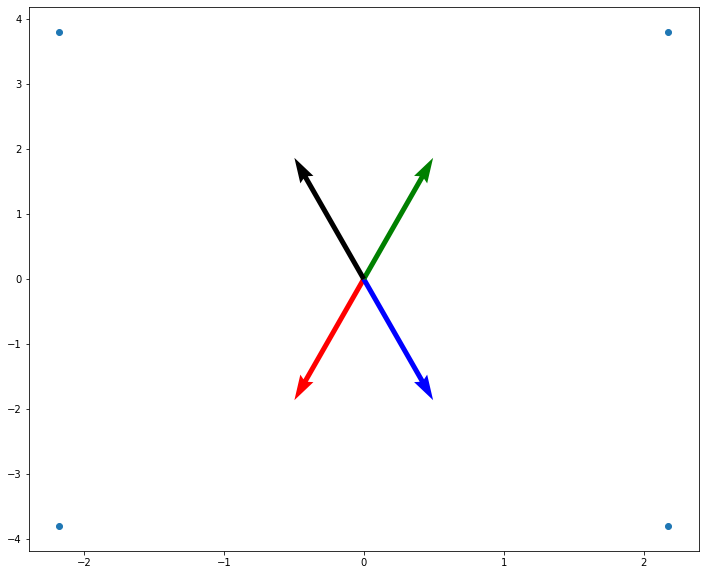

In [83]:
import numpy as np
import matplotlib.pyplot as plt

verts1 = np.array([
    [-x_max/2 - threshold, -y_max/2 - threshold],
    [x_max/2 + threshold, -y_max/2 - threshold],
    [x_max/2 + threshold, y_max/2 + threshold],
    [-x_max/2 - threshold, y_max/2 + threshold],
    #[-x_max/2 - threshold, -y_max/2 - threshold]
])

V = np.array([[1,1], [-2,2], [4,-7]])
origin = np.array([[0, 0, 0, 0],[0, 0, 0, 0]]) # origin point

plt.figure(figsize=(12,10))
plt.scatter(verts1[:,0], verts1[:,1])
plt.quiver(*origin, verts1[:,0], verts1[:,1], color=['r','b','g','k'], scale=21)
#plt.show()

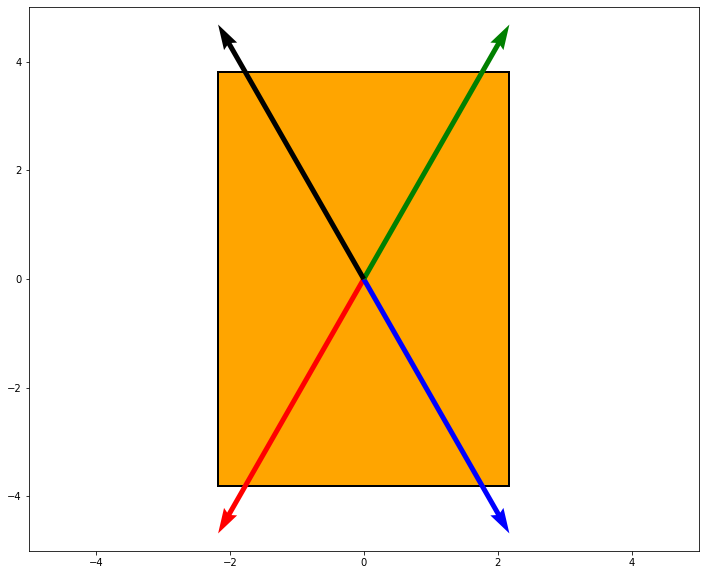

<Figure size 864x720 with 0 Axes>

In [85]:
fig, ax = plt.subplots(figsize=(12,10))
patch = patches.PathPatch(path, facecolor='orange', lw=2)
#ax.add_patch(patch)

###### background patch ######
threshold = 0.3

verts1 = np.array([
    [-x_max/2 - threshold, -y_max/2 - threshold],
    [x_max/2 + threshold, -y_max/2 - threshold],
    [x_max/2 + threshold, y_max/2 + threshold],
    [-x_max/2 - threshold, y_max/2 + threshold],
    [-x_max/2 - threshold, -y_max/2 - threshold]
])

codes1 = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]
path1 = Path(verts1, codes1)
patch1 = patches.PathPatch(path1, facecolor='orange', lw=2)
###### background patch ######

# add patches
ax.add_patch(patch1)

ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
#plt.axis("off")
#plt.title("Za Hando")

# -- vectors -- #
from locale import normalize
import numpy as np
import matplotlib.pyplot as plt

#V = np.array([[1,1], [-2,2], [4,-7]])
origin = np.array([[0, 0, 0, 0],[0, 0, 0, 0]]) # origin point

plt.figure(figsize=(12,10))
ax.quiver(*origin, verts1[:-1,0], verts1[:-1,1], color=['r','b','g','k'], scale=10)
# -- vectors -- #

plt.show()

In [86]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

soa = np.array([[1, -2, 0], [1, 1, 0],
                [2, 1, 0]])

origin = np.array([[0, 0, 0],[0, 0, 0],[0, 0, 0]]) # origin point


U, V, W = zip(*soa)
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(projection='3d')
ax.quiver(*origin, U, V, W, color=['k','k','k'], length=1, normalize=True)
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
plt.show()

In [51]:
import matplotlib.pyplot as plt
import numpy as np

ax = plt.figure(figsize=(12,10)).add_subplot(projection='3d')

# Make the grid
x, y, z = np.meshgrid(np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.8))

# Make the direction data for the arrows
u = np.sin(np.pi * x) * np.cos(np.pi * y) * np.cos(np.pi * z)
v = -np.cos(np.pi * x) * np.sin(np.pi * y) * np.cos(np.pi * z)
w = (np.sqrt(2.0 / 3.0) * np.cos(np.pi * x) * np.cos(np.pi * y) *
     np.sin(np.pi * z))

ax.quiver(x, y, z, u, v, w, length=0.1, normalize=True)

plt.show()


-----

In [12]:
from typing import Tuple
import numpy as np

def float_to_radiant(roll:float, pitch:float, yaw:float) -> Tuple[float,float,float]:
    """
    Function that returns the degree in radiants.
    To retrieve them, we multiply the float value by pi as described on the dataset information page.

    Args:
        roll (float): roll value belonging to [0,1]
        pitch (float): pitch value belonging to [0,1]
        yaw (float): yaw value belonging to [0,1]

    Returns:
        Tuple[float,float,float]: degrees in radiants.
    """
    roll_angle = np.pi*roll
    pitch_angle = np.pi*(pitch)
    yaw_angle = np.pi*(yaw)
    return roll_angle, pitch_angle, yaw_angle

def x_rotation(theta:float=np.pi/2) -> np.ndarray:
    """
    Returns the rotation matrix used to perform a counter clockwise rotation around the x axis

    Args:
        theta (float, optional): degree in radiants. Defaults to np.pi/2.

    Returns:
        np.ndarray: rotation matrix
    """
    # Usually roll. Since ENU framework was used, this will be the pitch.
    rot_mat = np.array([
        [1,             0,              0],
        [0, np.cos(theta), -np.sin(theta)],
        [0, np.sin(theta), +np.cos(theta)]
        ], dtype=float)
    return rot_mat

def y_rotation(theta:float=np.pi/2) -> np.ndarray:
    """    
    Returns the rotation matrix used to perform a counter clockwise rotation around the y axis

    Args:
        theta (float, optional): degree in radiants. Defaults to np.pi/2.

    Returns:
        np.ndarray: rotation matrix
    """
    # Usually pitch. Since ENU framework was used, this will be the roll.
    rot_mat = np.array([
        [+np.cos(theta), 0,  np.sin(theta)],
        [0,              1,              0],
        [-np.sin(theta), 0, +np.cos(theta)]
        ], dtype=float)
    return rot_mat

def z_rotation(theta:float=np.pi/2) -> np.ndarray:
    """    
    Returns the rotation matrix used to perform a counter clockwise rotation around the z axis

    Args:
        theta (float, optional): degree in radiants. Defaults to np.pi/2.

    Returns:
        np.ndarray: rotation matrix
    """
    # Yaw 
    rot_mat = np.array([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta), +np.cos(theta), 0],
        [            0,              0, 1]
        ], dtype=float)
    return rot_mat

def rotation_matrix(roll:float, pitch:float, yaw:float) -> np.ndarray:
    """
    Returns the matrix used to perform rotation along each axis. It's computed by composing rotation around the x, ,y and z axis.

    Args:
        roll (float): roll value belonging to [0,1]
        pitch (float): pitch value belonging to [0,1]
        yaw (float): yaw value belonging to [0,1]

    Returns:
        np.ndarray: Rotation matrix
    """
    roll_angle, pitch_angle, yaw_angle = float_to_radiant(roll, pitch, yaw)
    roll_mat = y_rotation(roll_angle)
    pitch_mat = x_rotation(pitch_angle)
    yaw_mat = z_rotation(yaw_angle)
    R = yaw_mat@pitch_mat@roll_mat
    return R.round(decimals=2)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def plot_frames(data:np.ndarray, lim:float, sign:str, folder:str, dx_plot_dict:dict, sx_plot_dict:dict, plot_axis:bool=True,):
    
    n_features_per_hand = 11
    sx_stack = data[:,3:6]
    dx_stack = data[:,3+n_features_per_hand:6+n_features_per_hand]

    v_dirs = np.array([[1, 0, 0], # versors' direction
                [0, 1, 0],
                [0, 0, 1]])

    origin = np.array([0,0,0]) # origin point, same origin point for x,y and, z
    
    for i in range(data.shape[0]): # data.shape = [ts_length, num_predictors]
    
        fig = plt.figure(figsize=(12,10))
        ax = fig.add_subplot(projection='3d')
        
        # pick x, y, z of the left hand and plot the movements
        sx_xs = data[:,0][:i + 1]
        sx_ys = data[:,1][:i + 1]
        sx_zs = data[:,2][:i + 1]
        sx_origin = np.array([sx_xs[-1], sx_ys[-1], sx_zs[-1]])
        ax.plot(sx_xs, sx_ys, sx_zs, **sx_plot_dict)#marker='o', label='sx', color='tab:blue', alpha=1, fillstyle=None)
        
        # pick x, y, z of the right hand and plot the movements
        dx_xs = data[:,11][:i + 1]
        dx_ys = data[:,12][:i + 1]
        dx_zs = data[:,13][:i + 1]
        dx_origin = np.array([dx_xs[-1], dx_ys[-1], dx_zs[-1]])
        ax.plot(dx_xs, dx_ys, dx_zs, **dx_plot_dict)#marker='o', label='dx', color='tab:orange', alpha=1, fillstyle=None)
        
        # pick pitch, roll, yaw of the left hand and plot the orientation
        sx_roll_angle = sx_stack[i,0]
        sx_pitch_angle = sx_stack[i,1] - 0.5 # offset due to normalization
        sx_yaw_angle = sx_stack[i,2] - 0.5 # offset due to normalization
        # compute the overall rotation matrix for the left hand
        sx_R = rotation_matrix(sx_roll_angle, sx_pitch_angle, sx_yaw_angle)
        
        # pick pitch, roll, yaw of the left hand and plot the orientation
        dx_roll_angle = dx_stack[i,0]
        dx_pitch_angle = dx_stack[i,1] - 0.5 # offset due to normalization
        dx_yaw_angle = dx_stack[i,2] - 0.5 # offset due to normalization
        # compute the overall rotation matrix for the right hand
        dx_R = rotation_matrix(dx_roll_angle, dx_pitch_angle, dx_yaw_angle)
        
        U, V, W = zip(*v_dirs)
        # perform the rotation of the versors for both left and right hand
        sx_UVW = sx_R@np.array([U, V, W])
        dx_UVW = dx_R@np.array([U, V, W])

        # sx_x
        ax.quiver(*sx_origin, *sx_UVW[:,0], color=['r'], length=.1, normalize=True, label='pitch axis', arrow_length_ratio=0.1, linewidths=1.5)
        # sx_y
        ax.quiver(*sx_origin, *sx_UVW[:,1], color=['g'], length=.1, normalize=True, label='roll axis', arrow_length_ratio=0.1, linewidths=1.5)
        # sx_z
        ax.quiver(*sx_origin, *sx_UVW[:,2], color=['b'], length=.1, normalize=True, label='yaw axis', arrow_length_ratio=0.1, linewidths=1.5)

        # dx_x
        ax.quiver(*dx_origin, *dx_UVW[:,0], color=['r'], length=.1, normalize=True, label='_dx_x: roll axis', arrow_length_ratio=0.1, linewidths=1.5)
        # dx_y
        ax.quiver(*dx_origin, *dx_UVW[:,1], color=['g'], length=.1, normalize=True, label='_dx_y: pitch axis', arrow_length_ratio=0.1, linewidths=1.5)
        # dx_z
        ax.quiver(*dx_origin, *dx_UVW[:,2], color=['b'], length=.1, normalize=True, label='_dx_z: yaw axis', arrow_length_ratio=0.1, linewidths=1.5)
        
        # set the limit of the axis
        ax.set_xlim([-lim, lim])
        ax.set_ylim([-lim, lim])
        ax.set_zlim([-lim, lim])
        
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        
        plt.title(f"Sign: '{sign}'")
        
        plt.legend()
        if not plot_axis:
            plt.axis('off')
        
        if i < 10:
            plt.savefig(f"{folder}/0{i}_{sign.lower()}.png", format='png', dpi=300)
        else:
            plt.savefig(f"{folder}/{i}_{sign.lower()}.png", format='png', dpi=300)
        plt.show()
    

In [216]:
one_data.shape

(62, 22)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import utils


features_1 = [
    'sx_x',
    'sx_y',
    'sx_z',
    'sx_roll',
    'sx_pitch',
    'sx_yaw',
    'sx_thumb',
    'sx_forefinger',
    'sx_middle_finger',
    'sx_ring_finger',
    'sx_little_finger',
    'dx_x',
    'dx_y',
    'dx_z',
    'dx_roll',
    'dx_pitch',
    'dx_yaw',
    'dx_thumb',
    'dx_forefinger',
    'dx_middle_finger',
    'dx_ring_finger',
    'dx_little_finger'
    ]


In [2]:
path = "./tctodd/"
dirs = os.listdir(path=path)
weeks = sorted([i for i in dirs if i != ".DS_Store"])
filenames = sorted(os.listdir(path+weeks[1]))

data = []
labels = dict()
label_cnt = 0

for w in weeks:
    temp_path = path+w+"/"
    filenames = sorted(os.listdir(temp_path))
    for fn in filenames:
        label = fn.split('.')[0][:-2]
        
        if label not in labels:
            labels[label] = label_cnt
            label_cnt += 1
            
        data.append({'label':labels[label], 'time_series':pd.read_csv(temp_path+fn, header=None, sep='\t',).values})
        

In [3]:
df = pd.DataFrame(data, columns=['label', 'time_series'])

In [4]:
X = df['time_series']
y = df['label']
seed = 0

In [5]:
X.iloc[0]
sx = X.iloc[0][:,3:6]
dx = X.iloc[0][:,3+11:6+11]
sx_roll, sx_pitch, sx_yaw = sx[:,0], sx[:,1], sx[:,2]
dx_roll, dx_pitch, dx_yaw = dx[:,0], dx[:,1], dx[:,2]

------
### check max and min of roll, pitch and yaw

In [8]:
#np.allclose(sx_roll, X.iloc[0][:,3])
np.min(dx_yaw), np.max(dx_yaw)

(0.527903, 0.666005)

In [9]:
d = dict()


for id in range(len(X)):
    l = []
    for i in range(X.iloc[id].shape[-1]):
        l.append(pd.Series(X.iloc[id][:,i]))
    d[id] = l

X_df = pd.DataFrame.from_dict(d, orient='index', columns=features_1)

In [10]:
columns = ['sx_roll','sx_pitch','sx_yaw', 'dx_roll','dx_pitch','dx_yaw']
X_df[columns].head(1)

sx_roll  \
0  0     0.626383
1     0.647282
2     0.646525
3...   

                                            sx_pitch  \
0  0     0.499976
1     0.486303
2     0.478735
3...   

                                              sx_yaw  \
0  0     0.506653
1     0.480203
2     0.466018
3...   

                                             dx_roll  \
0  0     0.233232
1     0.194742
2     0.183840
3...   

                                            dx_pitch  \
0  0     0.560134
1     0.585891
2     0.576174
3...   

                                              dx_yaw  
0  0     0.606738
1     0.632960
2     0.662819
3...

In [11]:
test_max = pd.DataFrame([X_df.iloc[i].apply(lambda x: np.max(x)) for i in range(len(X_df))])
test_min = pd.DataFrame([X_df.iloc[i].apply(lambda x: np.min(x)) for i in range(len(X_df))])
test_min.head()

sx_x      sx_y      sx_z   sx_roll  sx_pitch    sx_yaw  sx_thumb  \
0 -0.167157 -0.012699 -0.062360  0.422410  0.478735  0.453957  0.000000   
1 -0.110184 -0.151158 -0.113082  0.553285  0.200137  0.360680  0.154318   
2 -0.098040 -0.146291 -0.119601  0.589126  0.196670  0.290121  0.283684   
3 -0.145011  0.026950 -0.050260  0.453441  0.433177  0.547972  0.388920   
4 -0.151664 -0.144416 -0.049367  0.657292  0.206265  0.422486  0.197887   

   sx_forefinger  sx_middle_finger  sx_ring_finger  ...      dx_y      dx_z  \
0       0.000000               0.0             0.0  ... -0.002849 -0.065299   
1       0.000000               0.0             0.0  ... -0.124609 -0.124147   
2       0.000000               0.0             0.0  ... -0.142871 -0.121870   
3       0.073349               0.0             0.0  ...  0.001571 -0.124103   
4       0.000000               0.0             0.0  ... -0.163589 -0.074497   

    dx_roll  dx_pitch    dx_yaw  dx_thumb  dx_forefinger  dx_middle_finger  \
0  0.183840  0.451170  0.527903  0.000000            0.0               0.0   
1  0.208341  0.360152  0.540611  0.351706            0.0               0.0   
2  0.183328  0.317255  0.546995  0.498458            0.0               0.0   
3  0.217508  0.396432  0.516745  0.085787            0.0               0.0   
4  0.158827  0.300189  0.528526  0.309777            0.0               0.0   

   dx_ring_finger  dx_little_finger  
0             0.0          0.145143  
1             0.0          0.000000  
2             0.0          0.043766  
3             0.0          0.200490  
4             0.0          0.065137  

[5 rows x 22 columns]

In [12]:
test_max.max()[columns]

sx_roll     0.997842
sx_pitch    0.993448
sx_yaw      0.674636
dx_roll     0.997684
dx_pitch    0.997696
dx_yaw      0.987548
dtype: float64

In [13]:
test_min.min()[columns]

sx_roll     0.003024
sx_pitch    0.118787
sx_yaw      0.063674
dx_roll     0.000864
dx_pitch    0.036753
dx_yaw      0.001074
dtype: float64

--------

In [6]:
one = labels['hello'] # one-handed
two = labels['God'] #two-handed
spec_two = labels['where'] #specular two-handed

one_mask = df['label'] == one
two_mask = df['label'] == two
spec_two_mask = df['label'] == spec_two

one_data = df[one_mask].iloc[0]['time_series']
two_data = df[two_mask].iloc[0]['time_series']
spec_two_data = df[spec_two_mask].iloc[0]['time_series']

In [15]:
n_features_per_hand = 11
one_data[:,3+n_features_per_hand:6+n_features_per_hand].shape

(62, 3)

In [177]:
n_features_per_hand = 11
sx_stack = spec_two_data[:,3:6]
dx_stack = spec_two_data[:,3+n_features_per_hand:6+n_features_per_hand]

In [167]:
roll = np.linspace(0,1,num=6, endpoint=True)

pitch = np.linspace(0,1,num=6, endpoint=True)
#pitch = [i-epsilon for i in pitch]

yaw = np.linspace(0,1,num=6, endpoint=True)

num = len(yaw)

roll = np.array(num*[0.])
pitch = np.array(num*[0.5])
#yaw = np.array(num*[0.5])
stack = np.stack([roll, pitch, yaw]).T
for i in stack:
    print(i,'\n')
    print(rotation_matrix(*i))
    print(15*'-')

[0.  0.5 0. ] 

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
---------------
[0.  0.5 0.2] 

[[ 0.81 -0.59  0.  ]
 [ 0.59  0.81  0.  ]
 [ 0.    0.    1.  ]]
---------------
[0.  0.5 0.4] 

[[ 0.31 -0.95  0.  ]
 [ 0.95  0.31  0.  ]
 [ 0.    0.    1.  ]]
---------------
[0.  0.5 0.6] 

[[-0.31 -0.95  0.  ]
 [ 0.95 -0.31  0.  ]
 [ 0.    0.    1.  ]]
---------------
[0.  0.5 0.8] 

[[-0.81 -0.59  0.  ]
 [ 0.59 -0.81  0.  ]
 [ 0.    0.    1.  ]]
---------------
[0.  0.5 1. ] 

[[-1. -0.  0.]
 [ 0. -1.  0.]
 [ 0.  0.  1.]]
---------------


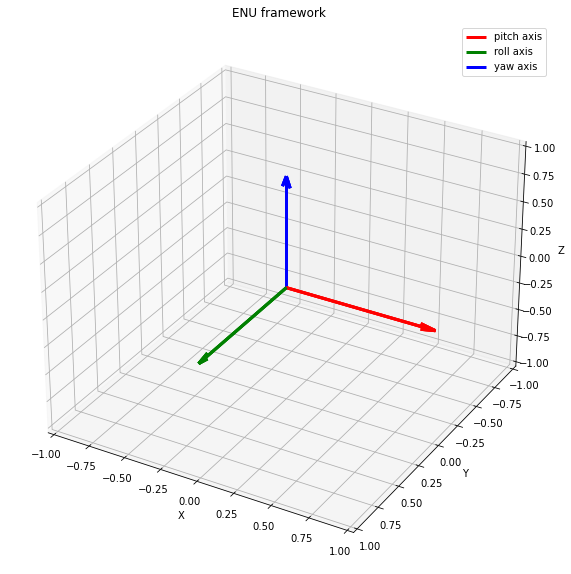

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import numpy as np
from utils import rotation
    
soa = np.array([[1, 0, 0], [0, 1, 0],
                [0, 0, 1]])

origin = np.array([[0, 0, 0],[0, 0, 0],[0, 0, 0]]) # origin point


roll = 0
pitch = 0
yaw = 0

U, V, W = zip(*soa)
UVW = np.array([U, V, W])
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(projection='3d')

sx_R = rotation.rotation_matrix(roll, pitch, yaw)

UVW = sx_R.round()@np.array([U, V, W])

ax.quiver(*origin, *UVW[:,0], color=['r'], length=1, normalize=True, label='pitch axis', arrow_length_ratio=0.1, linewidths=3)
ax.quiver(*origin, *UVW[:,1], color=['g'], length=1, normalize=True, label='roll axis', arrow_length_ratio=0.1, linewidths=3)
ax.quiver(*origin, *UVW[:,2], color=['b'], length=1, normalize=True, label='yaw axis', arrow_length_ratio=0.1, linewidths=3)

ax.set_xlim([-1,1])
ax.set_ylim([1,-1]) # swap y
ax.set_zlim([-1,1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.legend()
#plt.axis('off')
plt.title("ENU framework")
#plt.savefig("ENU_framework.png", format='png', dpi=500)
plt.show()

In [136]:
roll, pitch, yaw
[z_rotation(i) for i in yaw]
[x_rotation(i) for i in pitch]
[y_rotation(i) for i in roll]

[array([[ 1.,  0.,  0.],
        [ 0.,  1.,  0.],
        [-0.,  0.,  1.]]),
 array([[ 1.,  0.,  0.],
        [ 0.,  1.,  0.],
        [-0.,  0.,  1.]]),
 array([[ 1.,  0.,  0.],
        [ 0.,  1.,  0.],
        [-0.,  0.,  1.]])]

In [10]:
n_features_per_hand = 11
sx_stack = two_data[:,3:6]
dx_stack = two_data[:,3+n_features_per_hand:6+n_features_per_hand]
two_data.shape

(90, 22)

In [61]:
dx_stack[:,-1]

array([0.591858, 0.527638, 0.499805, 0.553307, 0.558068, 0.502829,
       0.494183, 0.543883, 0.558727, 0.512619, 0.501083, 0.537327,
       0.548485, 0.51655 , 0.506674, 0.490149, 0.493292, 0.504086,
       0.512229, 0.523484, 0.527781, 0.528867, 0.532078, 0.5301  ,
       0.528599, 0.527854, 0.527574, 0.527195, 0.525938, 0.525596,
       0.525755, 0.526463, 0.52551 , 0.524583, 0.524558, 0.523997,
       0.521494, 0.520835, 0.521299, 0.521165, 0.520725, 0.520469,
       0.520298, 0.519529, 0.518454, 0.519297, 0.519358, 0.518967,
       0.51937 , 0.522007, 0.523057, 0.522935, 0.522984, 0.523179,
       0.523069, 0.522471, 0.522117, 0.521995, 0.521494, 0.521372,
       0.521323, 0.521397, 0.521079, 0.520762, 0.521042, 0.52136 ,
       0.521836, 0.522056, 0.522214, 0.521848, 0.521458, 0.521616,
       0.521067, 0.520786, 0.52136 , 0.521799, 0.5223  , 0.522678,
       0.523386, 0.523557, 0.523423, 0.523338, 0.523447, 0.522996,
       0.522019, 0.521494, 0.521055, 0.520273, 0.519614, 0.518

In [62]:
sx_stack[:,-1]

array([0.452199, 0.480862, 0.496384, 0.457656, 0.464309, 0.497848,
       0.501212, 0.470644, 0.468361, 0.494497, 0.502744, 0.475063,
       0.467055, 0.484988, 0.497024, 0.548668, 0.555565, 0.533506,
       0.517942, 0.506919, 0.504233, 0.51146 , 0.517197, 0.517417,
       0.518223, 0.51749 , 0.517295, 0.517856, 0.517661, 0.516611,
       0.516306, 0.517075, 0.516819, 0.516721, 0.516868, 0.51782 ,
       0.518381, 0.518845, 0.520334, 0.522178, 0.522691, 0.522556,
       0.521494, 0.523069, 0.522092, 0.522044, 0.521934, 0.521787,
       0.521128, 0.521397, 0.522056, 0.521848, 0.521799, 0.522141,
       0.522214, 0.521409, 0.52081 , 0.520359, 0.518711, 0.51981 ,
       0.522227, 0.521885, 0.521201, 0.520334, 0.520151, 0.519639,
       0.518711, 0.518467, 0.519126, 0.51904 , 0.518906, 0.519248,
       0.518833, 0.518308, 0.520188, 0.519004, 0.518235, 0.51727 ,
       0.518064, 0.518516, 0.518613, 0.519394, 0.520212, 0.520102,
       0.519748, 0.520127, 0.520298, 0.519822, 0.5197  , 0.519

# Final test


In [10]:
one = labels['hello'] # one-handed
two = labels['God'] #two-handed
spec_two = labels['where'] #specular two-handed

one_mask = df['label'] == one
two_mask = df['label'] == two
spec_two_mask = df['label'] == spec_two

one_data = df[one_mask].iloc[0]['time_series']
two_data = df[two_mask].iloc[0]['time_series']
spec_two_data = df[spec_two_mask].iloc[0]['time_series']

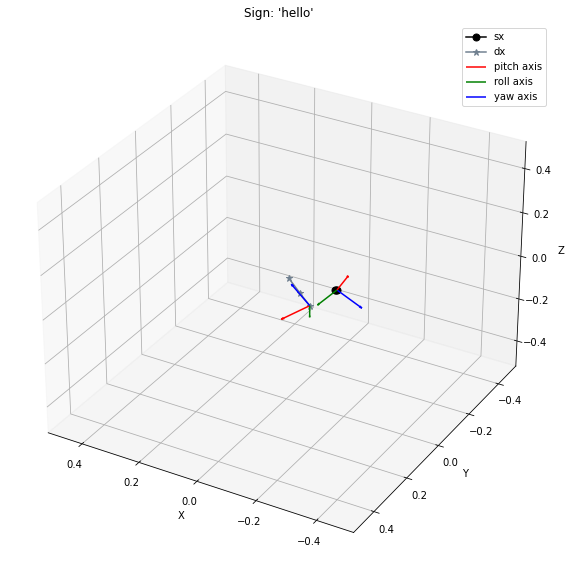

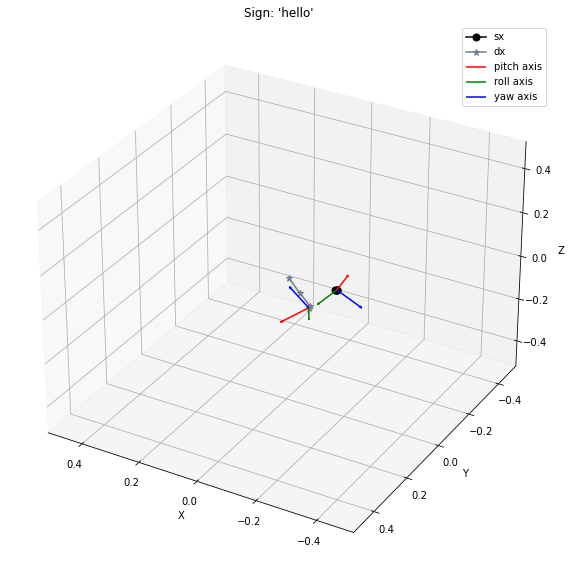

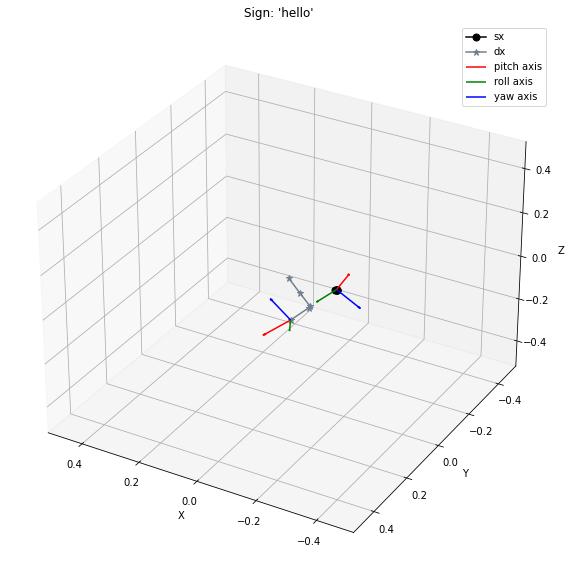

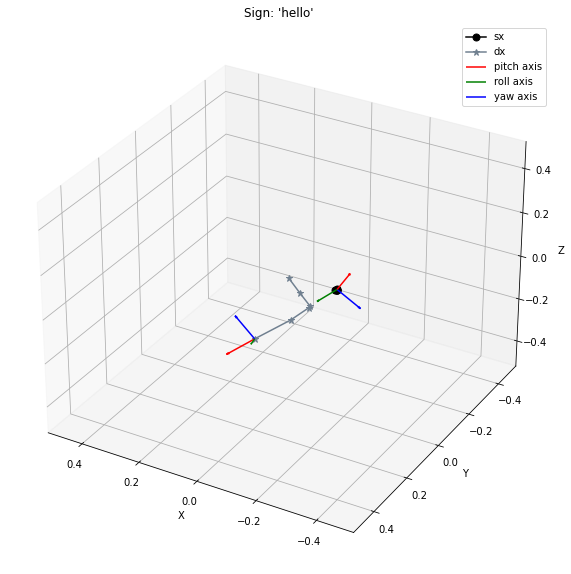

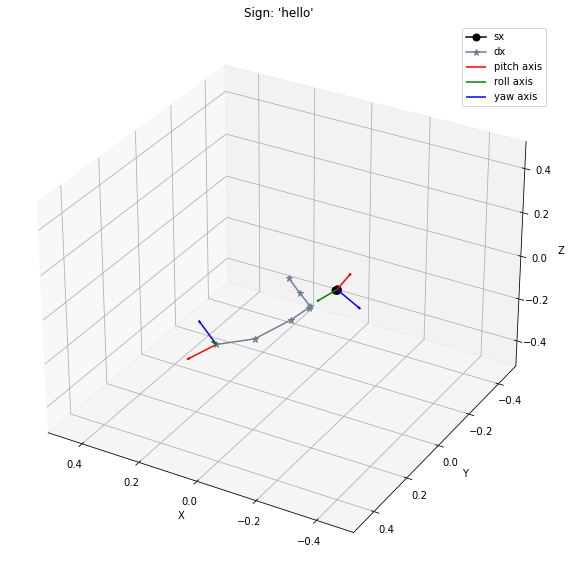

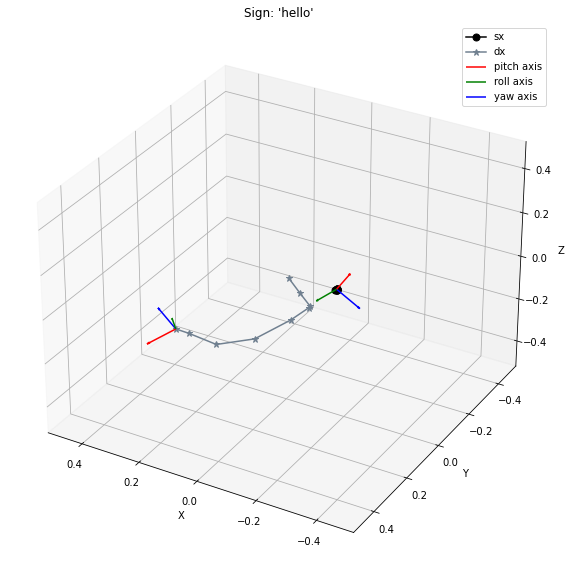

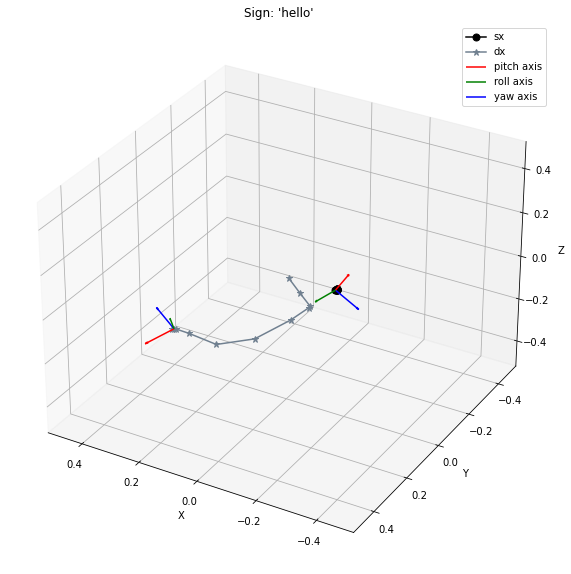

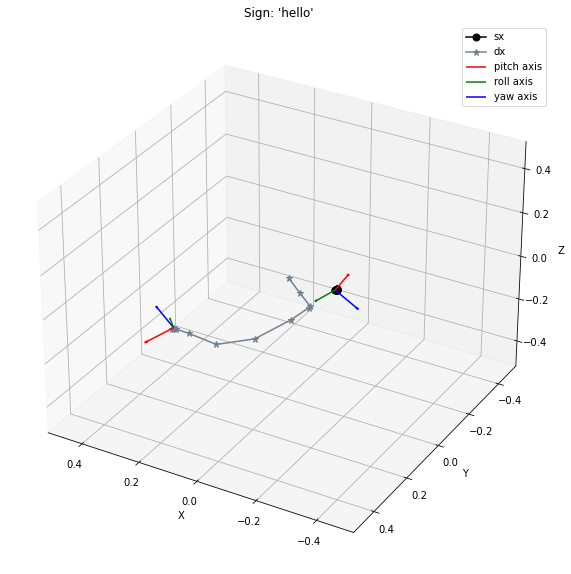

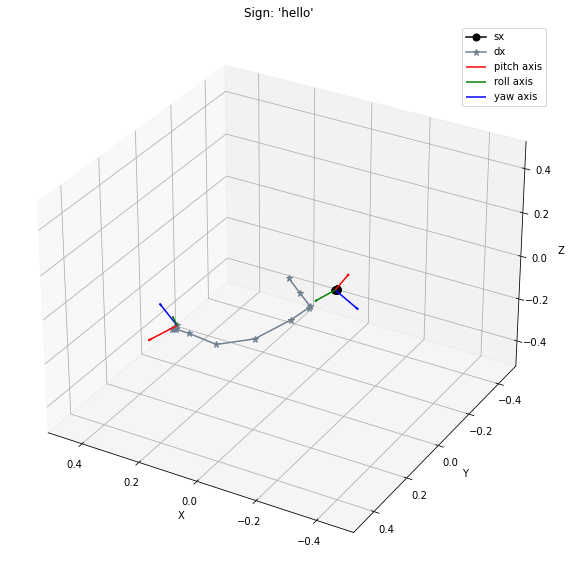

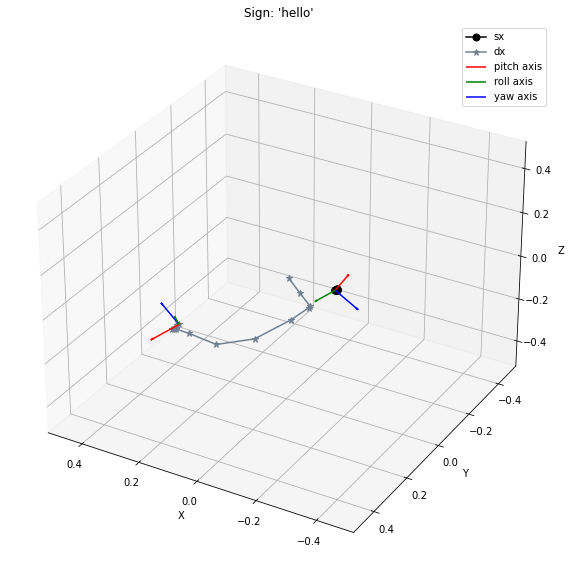

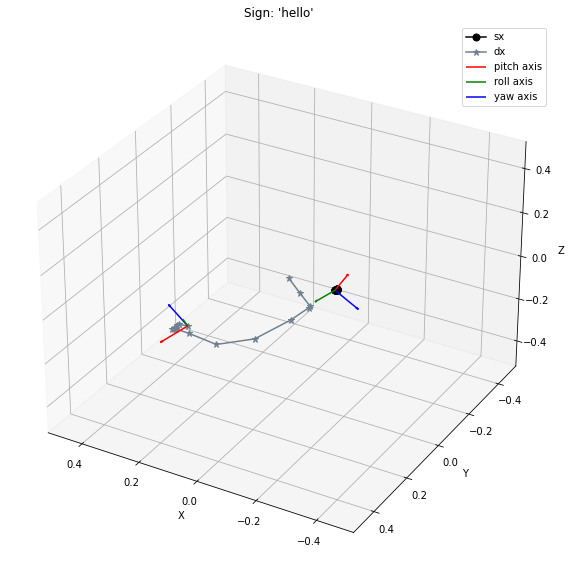

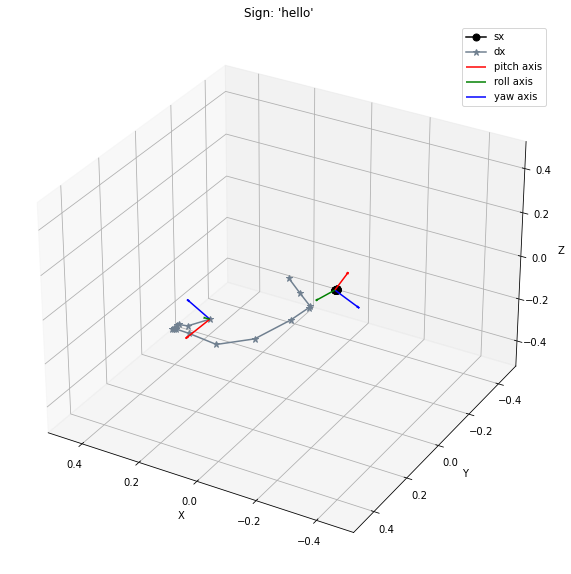

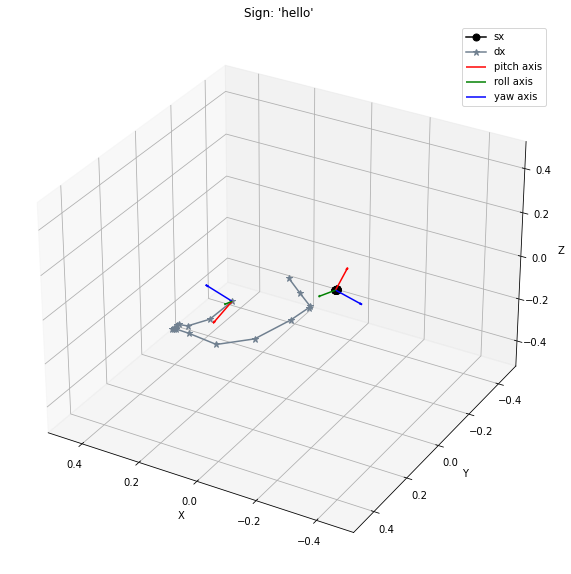

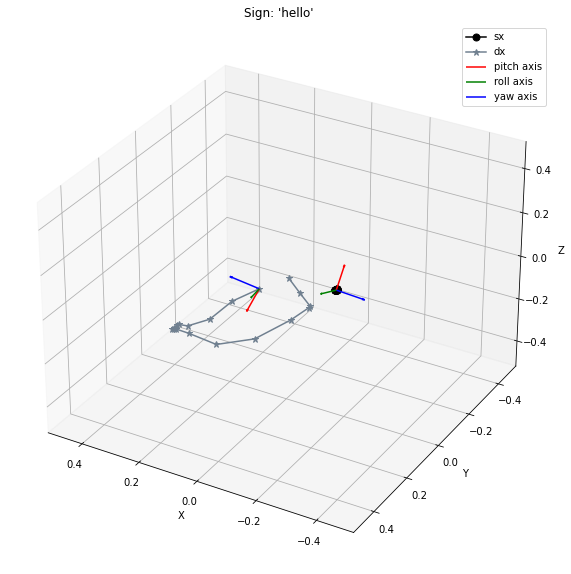

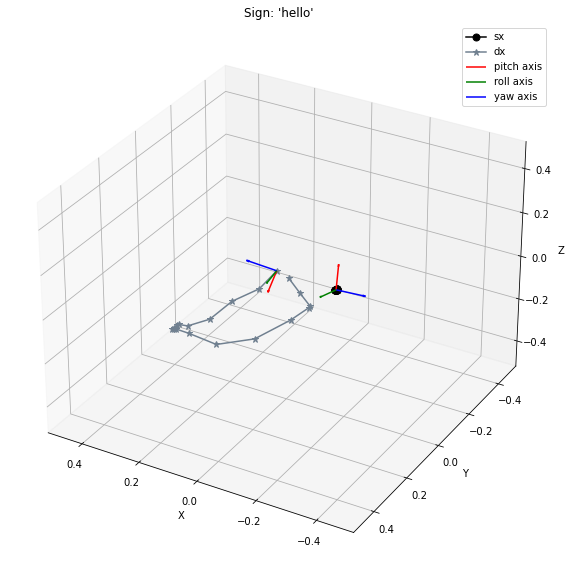

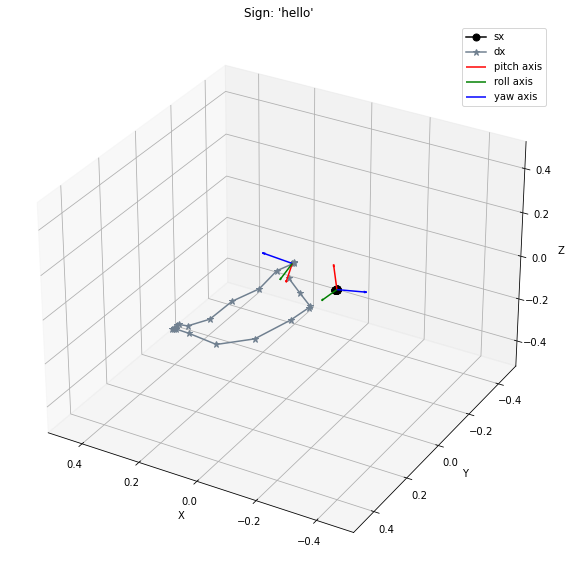

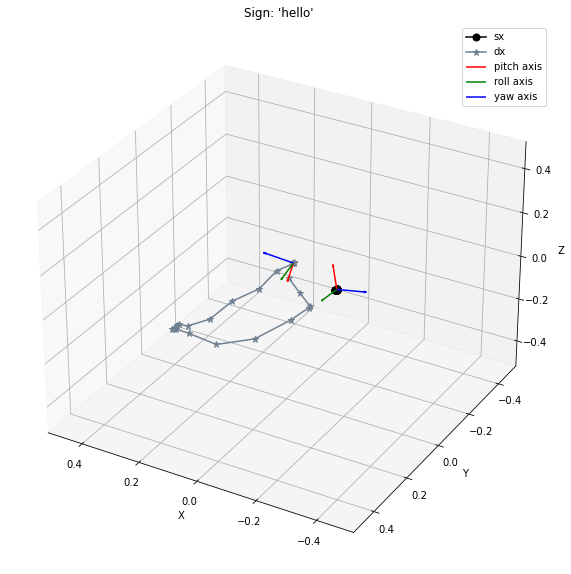

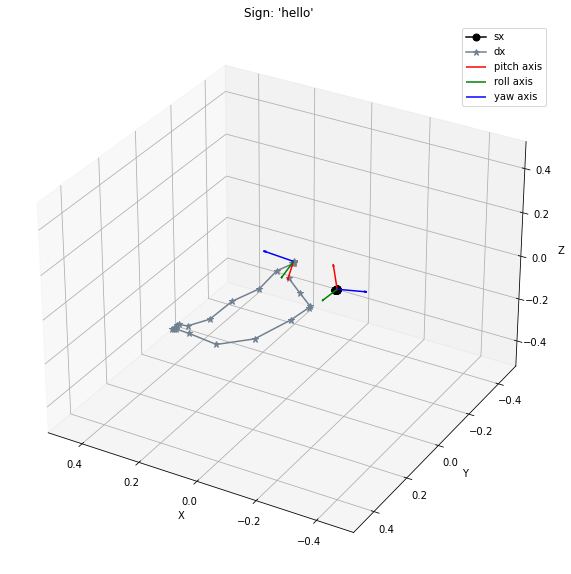

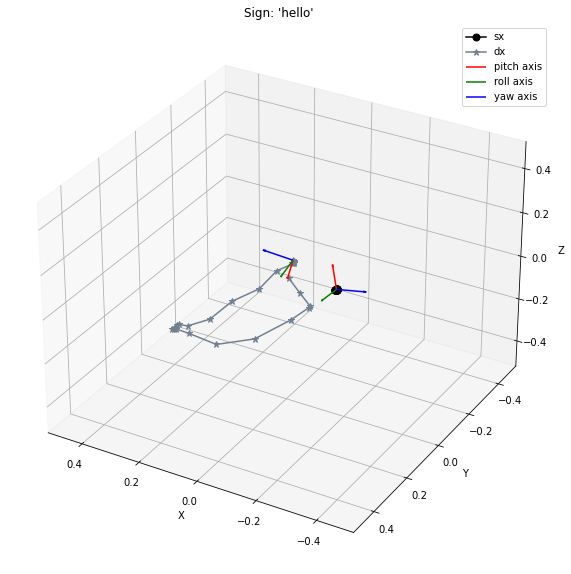

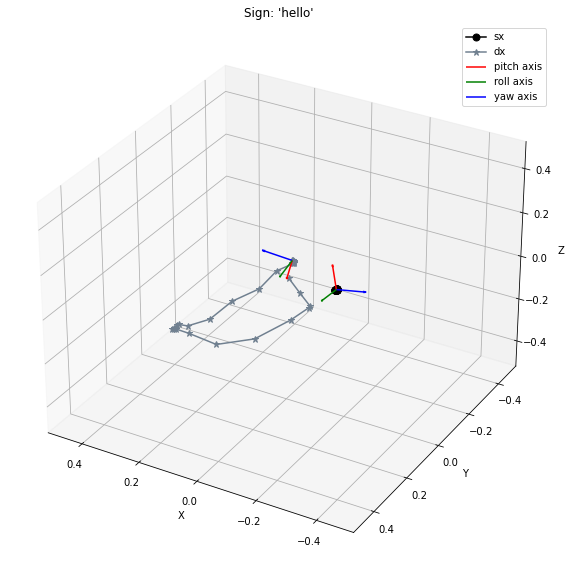

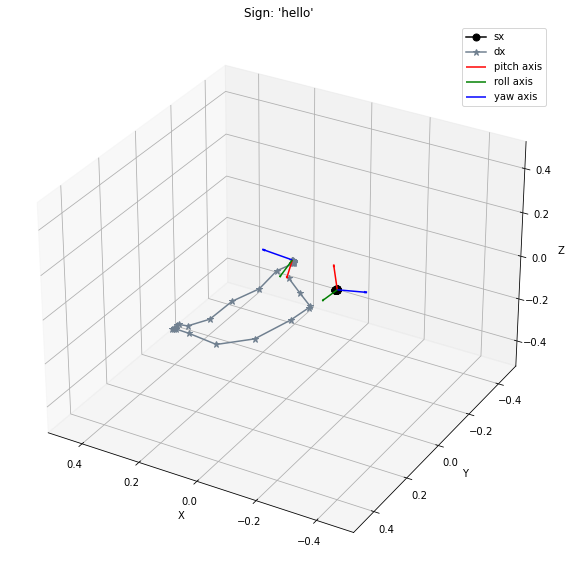

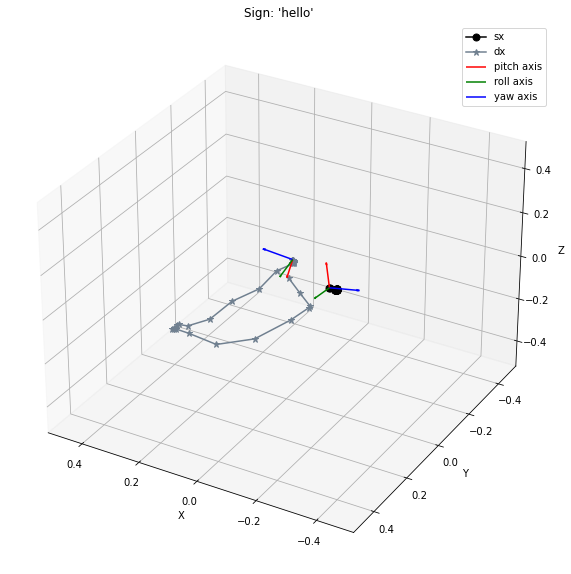

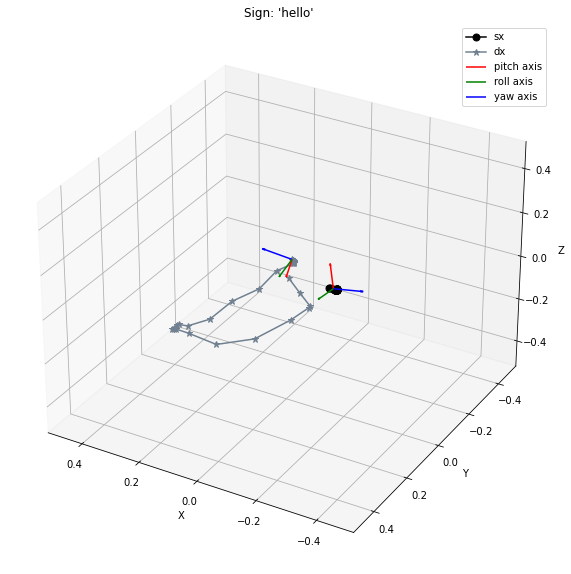

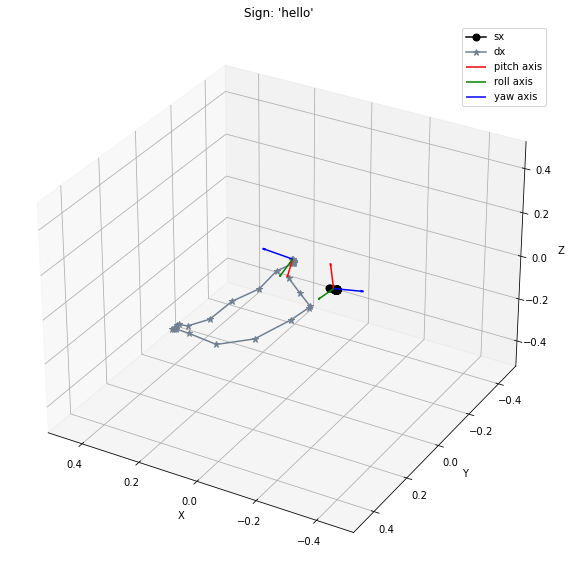

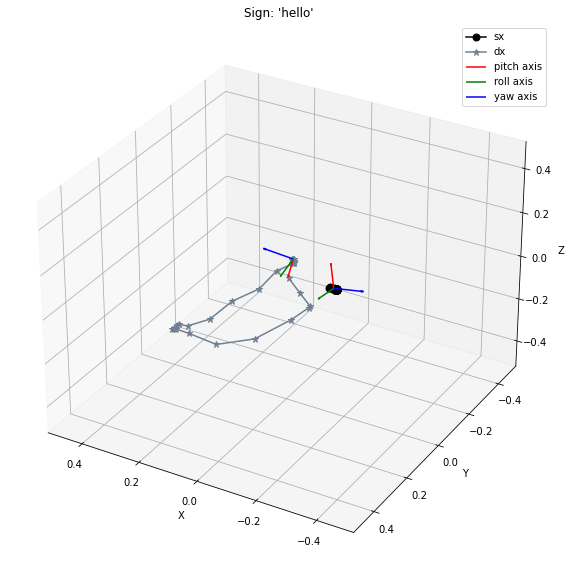

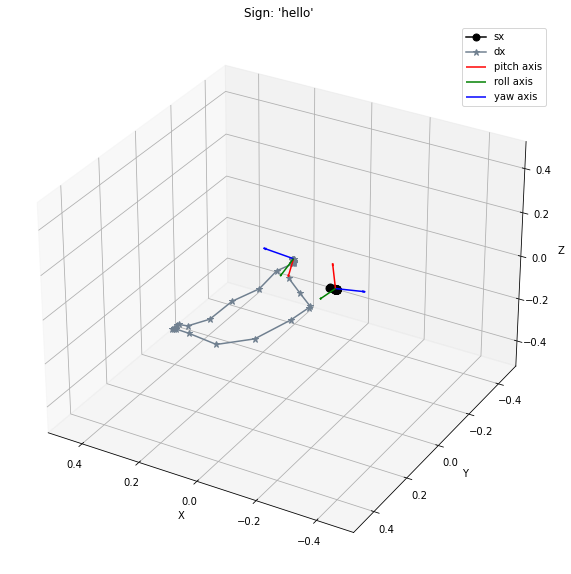

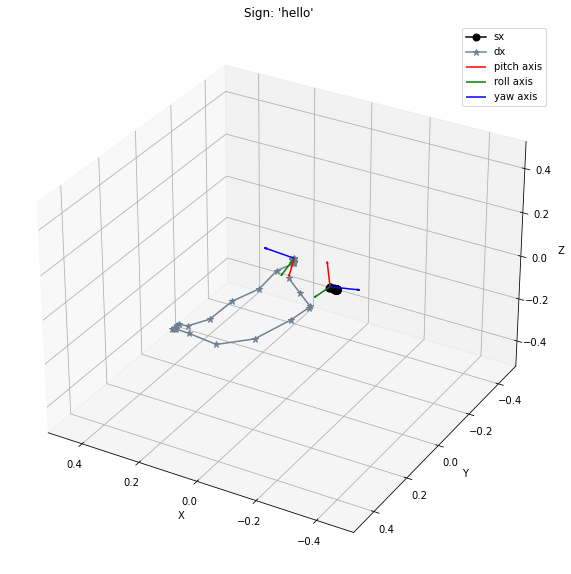

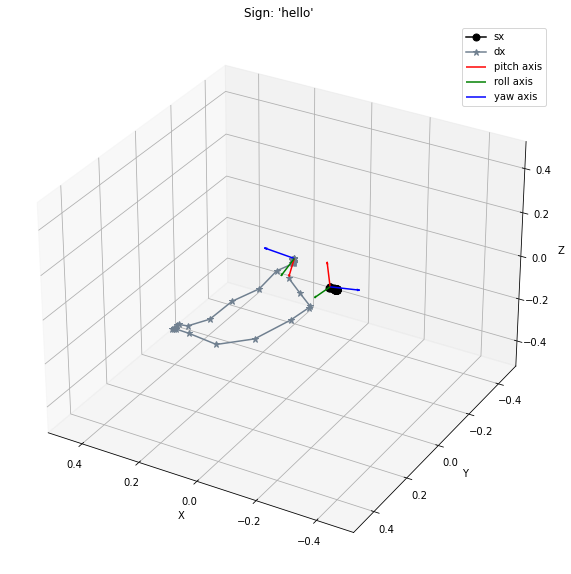

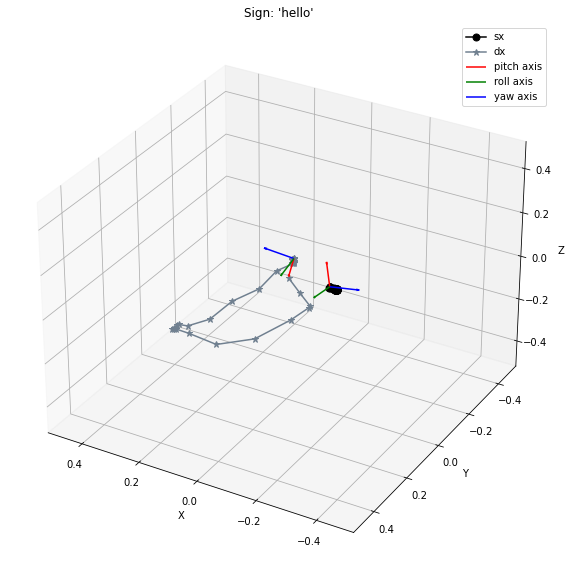

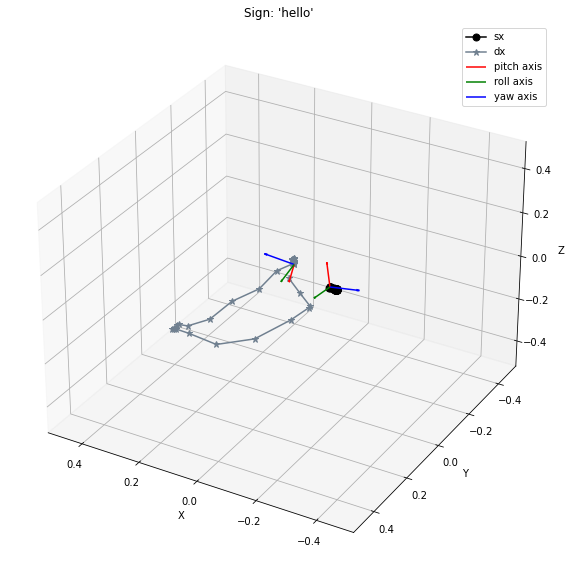

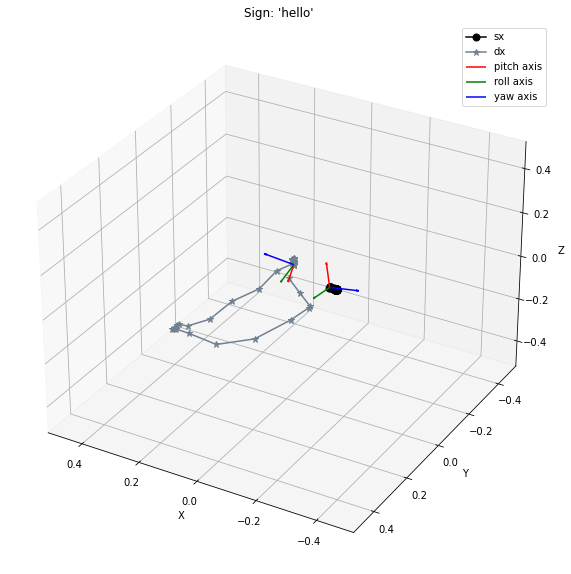

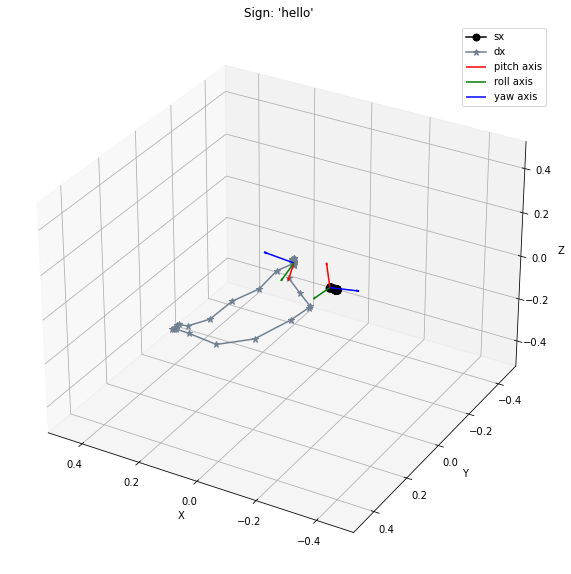

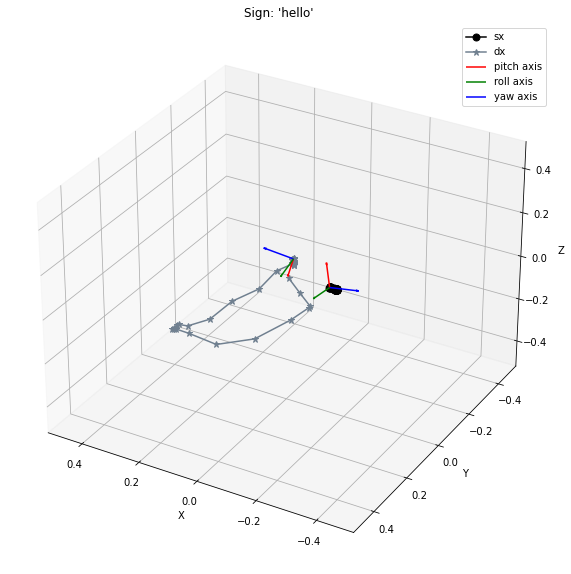

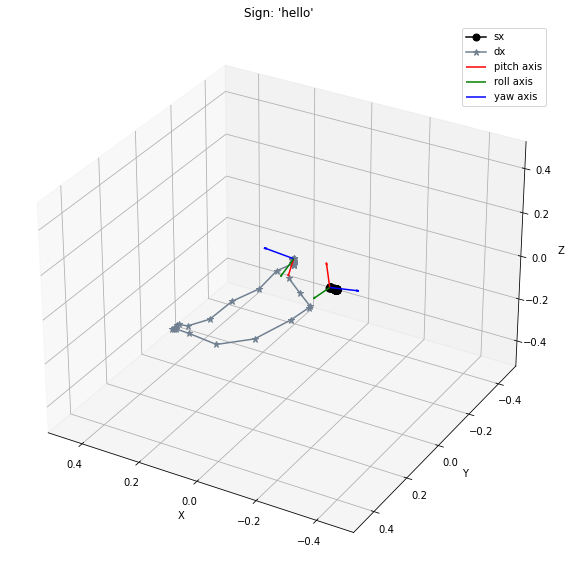

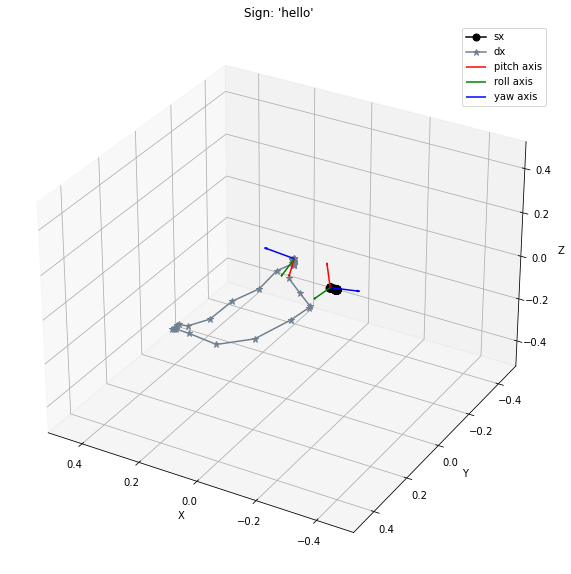

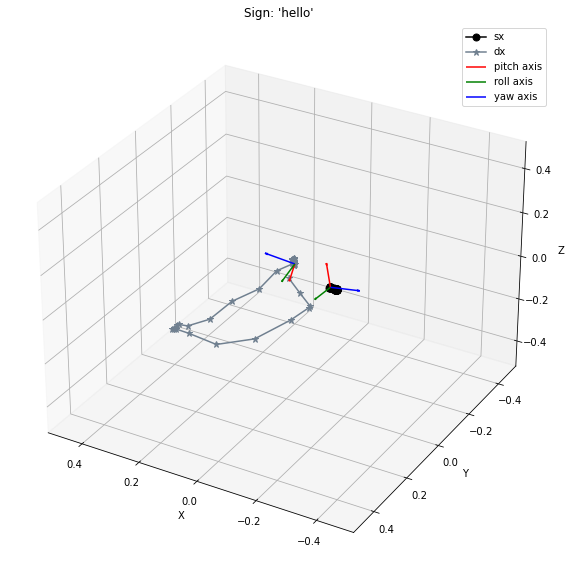

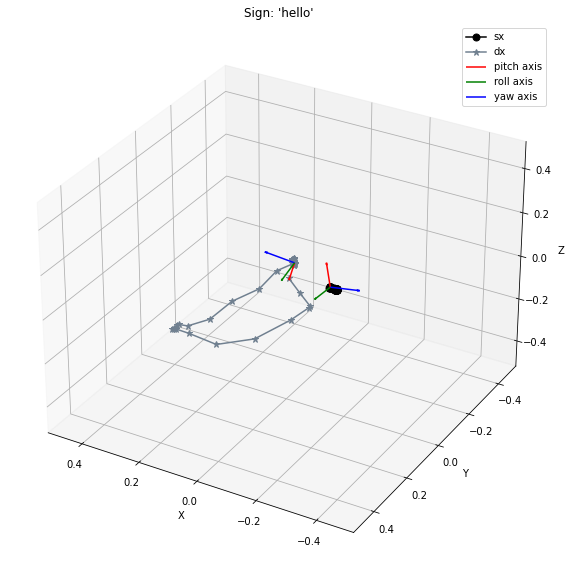

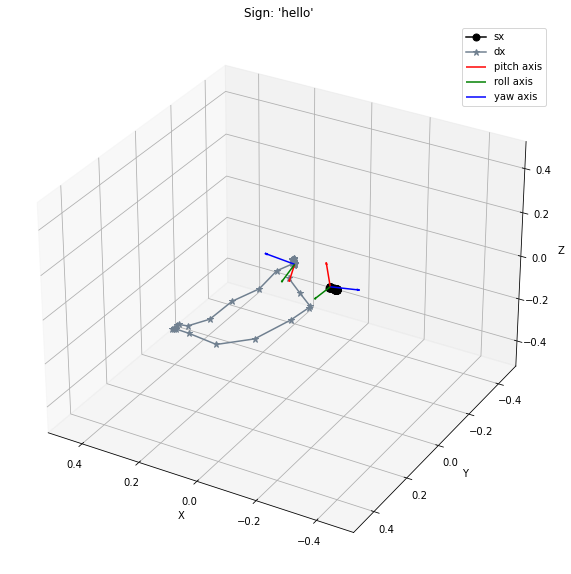

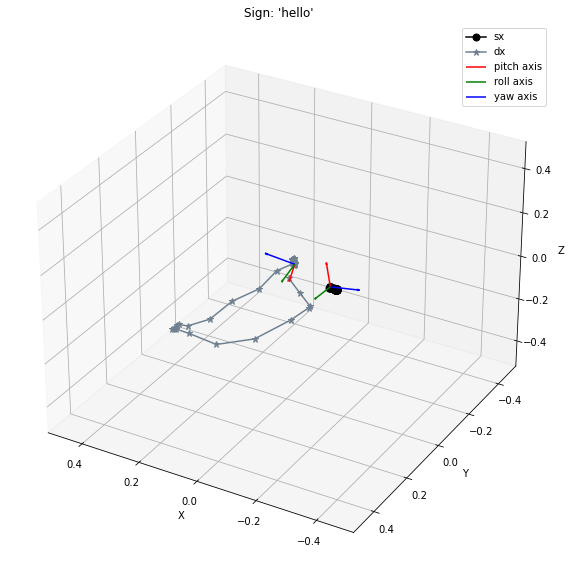

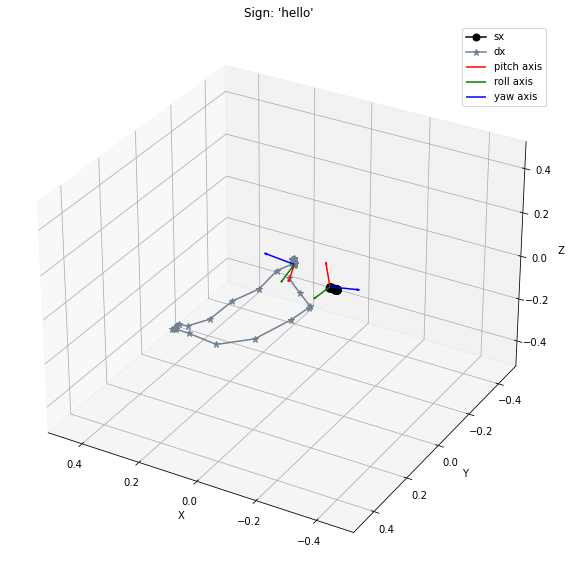

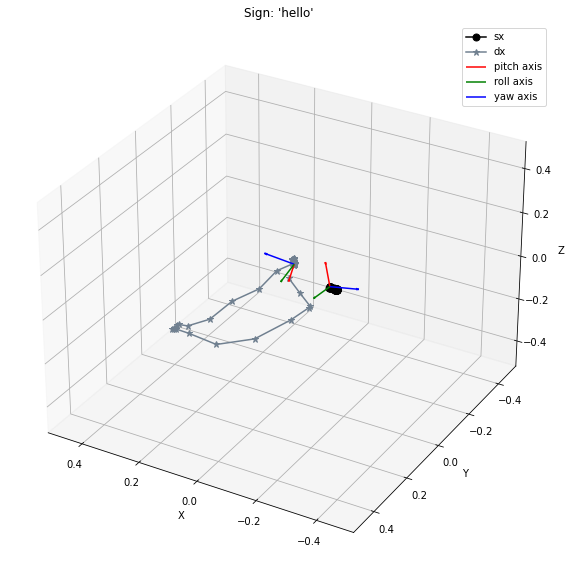

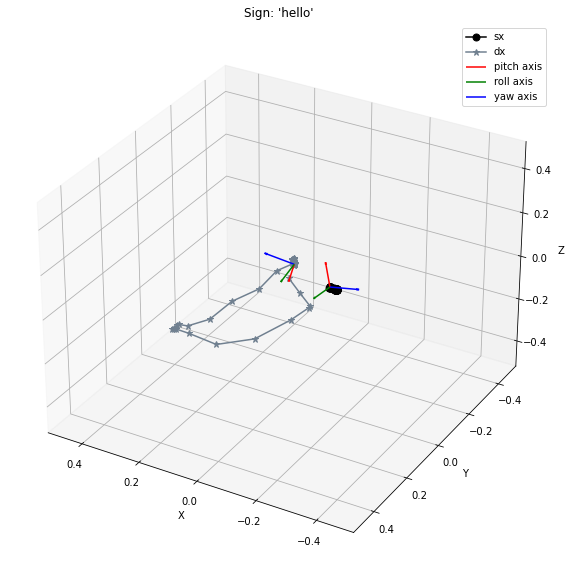

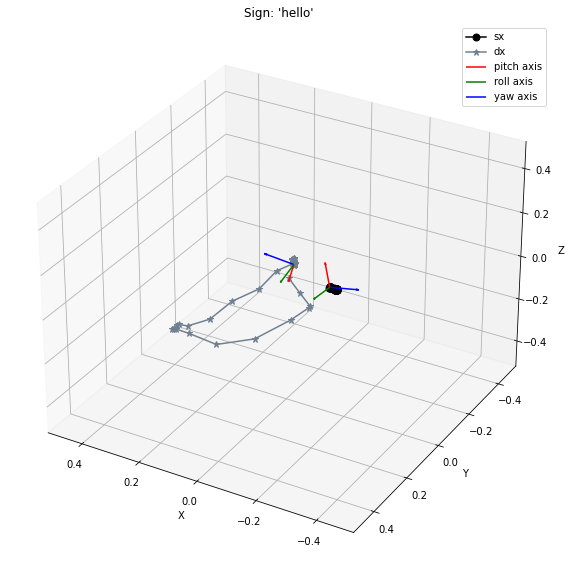

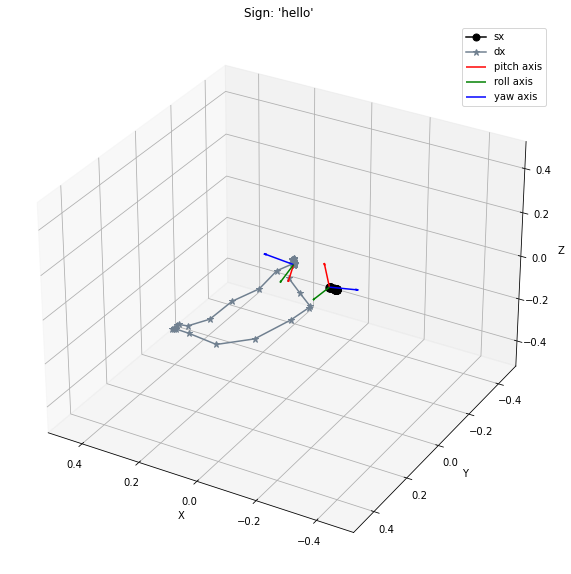

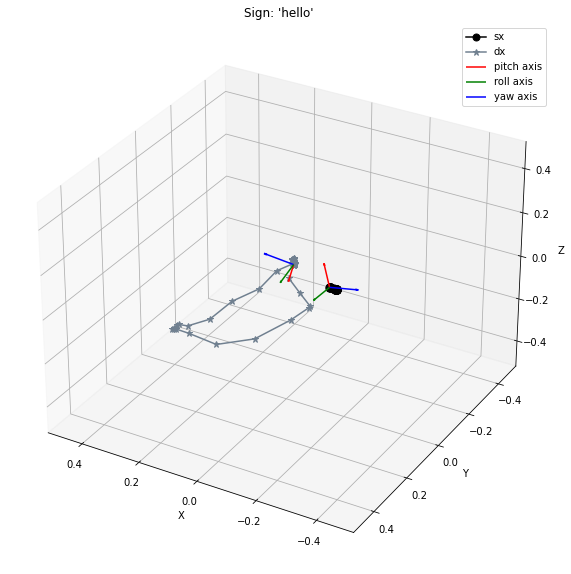

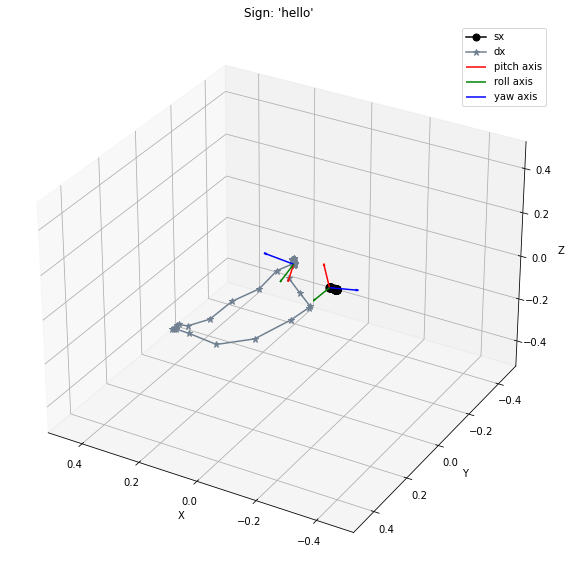

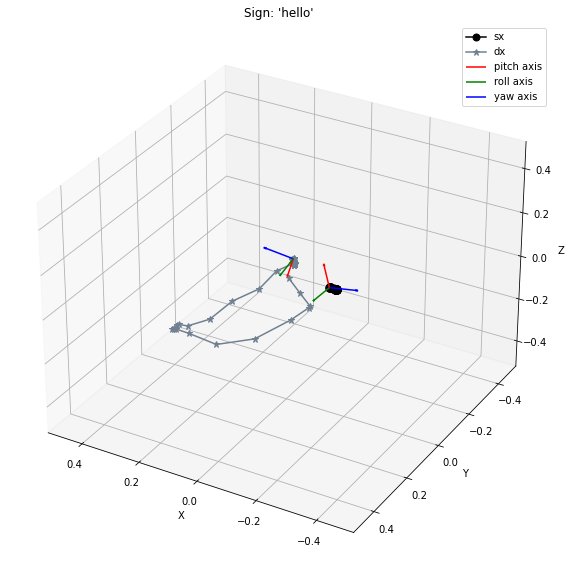

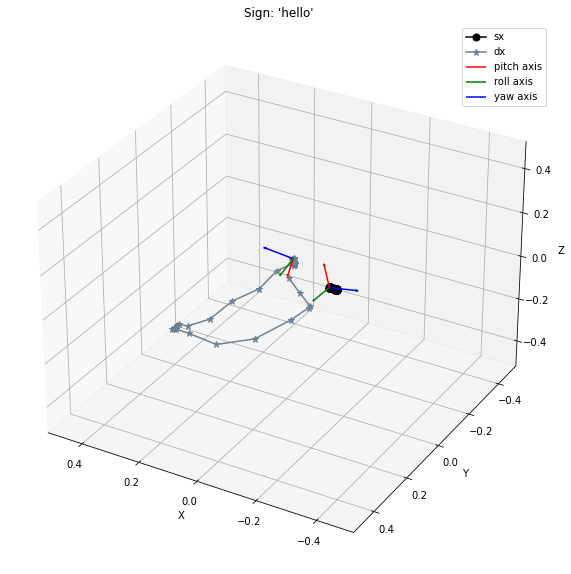

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

n_features_per_hand = 11
sx_stack = two_data[:,3:6]
dx_stack = two_data[:,3+n_features_per_hand:6+n_features_per_hand]

v_dirs = np.array([[1, 0, 0], # versors' direction
                [0, 1, 0],
                [0, 0, 1]])

#origin = np.array([[0, 0, 0],[0, 0, 0],[0, 0, 0]]) # origin point
origin = np.array([0,0,0]) # origin point, same origin point for x,y and, z
for i in range(one_data.shape[0]):
    
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(projection='3d')
    
    sx_xs = one_data[:,0][:i + 1]
    sx_ys = one_data[:,1][:i + 1]
    sx_zs = one_data[:,2][:i + 1]
    sx_origin = np.array([sx_xs[-1], sx_ys[-1], sx_zs[-1]])
    ax.plot(sx_xs, sx_ys, sx_zs, marker='o', label='sx', color='black', alpha=1, markersize=7)
    
    dx_xs = one_data[:,11][:i + 1]
    dx_ys = one_data[:,12][:i + 1]
    dx_zs = one_data[:,13][:i + 1]
    dx_origin = np.array([dx_xs[-1], dx_ys[-1], dx_zs[-1]])
    ax.plot(dx_xs, dx_ys, dx_zs, marker='*', label='dx', color='slategray', alpha=1, markersize=7)
    
    
    sx_roll_angle = -sx_stack[i,0] # add minus to fix mirroring
    sx_pitch_angle = sx_stack[i,1] - 0.5 # offset due to normalization
    sx_yaw_angle = sx_stack[i,2] - 0.5 # offset due to normalization
    sx_R = rotation.rotation_matrix(sx_roll_angle, sx_pitch_angle, sx_yaw_angle)
    
    dx_roll_angle = dx_stack[i,0]
    dx_pitch_angle = dx_stack[i,1] - 0.5 # offset due to normalization
    dx_yaw_angle = dx_stack[i,2] - 0.5 # offset due to normalization
    dx_R = rotation.rotation_matrix(dx_roll_angle, dx_pitch_angle, dx_yaw_angle)
    
    U, V, W = zip(*v_dirs)
    sx_UVW = sx_R@np.array([U, V, W])
    dx_UVW = dx_R@np.array([U, V, W])

    # sx_x
    ax.quiver(*sx_origin, *sx_UVW[:,0], color=['r'], length=.1, normalize=True, label='pitch axis', arrow_length_ratio=0.1, linewidths=1.5)
    # sx_y
    ax.quiver(*sx_origin, *sx_UVW[:,1], color=['g'], length=.1, normalize=True, label='roll axis', arrow_length_ratio=0.1, linewidths=1.5)
    # sx_z
    ax.quiver(*sx_origin, *sx_UVW[:,2], color=['b'], length=.1, normalize=True, label='yaw axis', arrow_length_ratio=0.1, linewidths=1.5)

    # dx_x
    ax.quiver(*dx_origin, *dx_UVW[:,0], color=['r'], length=.1, normalize=True, label='_dx_x: roll axis', arrow_length_ratio=0.1, linewidths=1.5)
    # dx_y
    ax.quiver(*dx_origin, *dx_UVW[:,1], color=['g'], length=.1, normalize=True, label='_dx_y: pitch axis', arrow_length_ratio=0.1, linewidths=1.5)
    # dx_z
    ax.quiver(*dx_origin, *dx_UVW[:,2], color=['b'], length=.1, normalize=True, label='_dx_z: yaw axis', arrow_length_ratio=0.1, linewidths=1.5)
    
    
    ax.set_xlim([-.5, .5])
    ax.set_ylim([-.5, .5])
    ax.set_zlim([-.5, .5])
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    plt.title("Sign: 'hello'")
    
    plt.legend()
    #plt.axis('off')
    
    #if i < 10:
    #    plt.savefig(f"god_gif/0{i}_god.png", format='png', dpi=300)
    #else:
    #    plt.savefig(f"god_gif/{i}_god.png", format='png', dpi=300)
    plt.show()


In [ ]:
one = labels['hello'] # one-handed
two = labels['God'] #two-handed
spec_two = labels['where'] #specular two-handed

one_mask = df['label'] == one
two_mask = df['label'] == two
spec_two_mask = df['label'] == spec_two

one_data = df[one_mask].iloc[0]['time_series']
two_data = df[two_mask].iloc[0]['time_series']
spec_two_data = df[spec_two_mask].iloc[0]['time_series']

sx_plot_dict = {'marker':'s', 'markersize':7, 'color':'tab:green', 'alpha':1, 'linestyle':'dotted', 'label':'sx'}
dx_plot_dict = {'marker':'*', 'markersize':7, 'color':'tab:red', 'alpha':1, 'linestyle':'dotted', 'label':'dx'}
plot_frames(one_data, lim=.3, sign='hello', folder='hello_gif', sx_plot_dict=sx_plot_dict, dx_plot_dict=dx_plot_dict, plot_axis=True)

In [271]:
import cv2
import numpy as np
import glob

img_array = []
imgs = []
for filename in glob.glob('hello_gif/*.png'):
    imgs.append(filename)
for filename in sorted(imgs):
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)


out = cv2.VideoWriter('video/rpy_hello.mp4',cv2.VideoWriter_fourcc(*'mp4v'), 15, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

In [268]:
np.min(spec_two_data[:,0])

-0.308162

# test functions

In [ ]:
from utils import visualization

one = labels['hello'] # one-handed
two = labels['God'] #two-handed
spec_two = labels['where'] #specular two-handed

one_mask = df['label'] == one
two_mask = df['label'] == two
spec_two_mask = df['label'] == spec_two

one_data = df[one_mask].iloc[0]['time_series']
two_data = df[two_mask].iloc[0]['time_series']
spec_two_data = df[spec_two_mask].iloc[0]['time_series']

sx_plot_dict = {'marker':'s', 'markersize':7, 'color':'tab:green', 'alpha':1, 'linestyle':'dotted', 'label':'sx'}
dx_plot_dict = {'marker':'*', 'markersize':7, 'color':'tab:red', 'alpha':1, 'linestyle':'dotted', 'label':'dx'}
visualization.plot_frames(one_data, lim=.3, sign='hello', folder='hello_gif', sx_plot_dict=sx_plot_dict, dx_plot_dict=dx_plot_dict, plot_axis=True)

In [6]:
import cv2
import numpy as np
import glob

img_array = []
imgs = []
for filename in glob.glob('hello_gif/*.png'):
    imgs.append(filename)
for filename in sorted(imgs):
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)


out = cv2.VideoWriter('video/rpy_hello1.mp4',cv2.VideoWriter_fourcc(*'mp4v'), 15, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

In [10]:
num_feat = 11
sx = one_data[:,4:7]
dx = one_data[:,4+num_feat:7+num_feat]
for i in range(len(sx)):
    print(sx[i], dx[i])

[0.399435 0.504855 0.429808] [0.397946 0.555443 0.224264]
[0.398776 0.506992 0.432489] [0.488964 0.604639 0.140957]
[0.397751 0.505686 0.43383 ] [0.558034 0.661867 0.075857]
[0.398434 0.505405 0.431819] [0.601517 0.712101 0.045513]
[0.398581 0.504941 0.432489] [0.662627 0.717911 0.01848 ]
[0.398288 0.503647 0.429808] [0.747761 0.660817 0.007998]
[0.397678 0.503268 0.429808] [0.810361 0.564208 0.025652]
[0.397263 0.503342 0.429808] [0.806601 0.476449 0.037789]
[0.396799 0.503403 0.429808] [0.806626 0.442238 0.043858]
[0.393625 0.502622 0.429808] [0.798154 0.444325 0.046617]
[0.404465 0.502438 0.429808] [0.795444 0.443458 0.051582]
[0.40444  0.503122 0.43383 ] [0.783236 0.43788  0.064823]
[0.404343 0.503244 0.425116] [0.773934 0.431739 0.071443]
[0.403439 0.503061 0.423105] [0.755843 0.440443 0.085787]
[0.403659 0.50333  0.433159] [0.709333 0.453945 0.114476]
[0.391842 0.503806 0.446565] [0.647929 0.469753 0.156956]
[0.393063 0.5035   0.443214] [0.560573 0.484109 0.225919]
[0.394552 0.50